# **23-AI-36**

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold

%matplotlib inline

# **Load the Dataset**

In [26]:
data = pd.read_csv("StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# **Remove constant Features**

In [39]:
# These are numerical columns
variance_thres = VarianceThreshold(threshold=0)
variance_thres.fit(data[["math score", "reading score", "writing score"]])

VarianceThreshold(threshold=0)

In [40]:
variance_thres.get_support()

array([ True,  True,  True])

In [41]:
data[["math score", "reading score", "writing score"]].columns[variance_thres.get_support()]

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [42]:
constant_feature = [column for column in data[["math score", "reading score", "writing score"]].columns if column not in data[["math score", "reading score", "writing score"]].columns[variance_thres.get_support()]]
constant_feature

[]

In [43]:
data.drop(constant_feature, axis = 1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# **Hancle Missing Values**

In [44]:
for i in data.columns:
  if data[i].dtype == "int64":
    data = data.fillna(data[i].mean())

  else:
    data = data.fillna(data[i].mode)

In [45]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


(array([  2.,   2.,  10.,  26.,  95., 188., 268., 216., 135.,  58.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

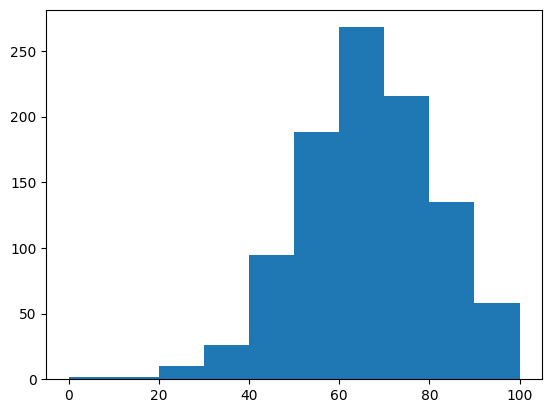

In [54]:
plt.hist(data['math score'])

This graph shows that between 60 to 70 the count is above 250 then come to decrease

<Axes: ylabel='count'>

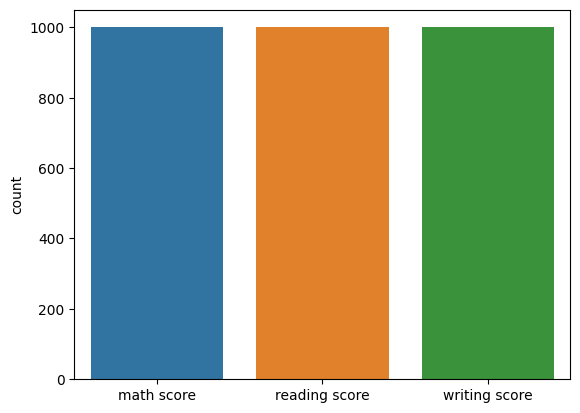

In [57]:
sns.countplot(data)